In [1]:
# Imports

from CamoWorms.CamoWorms import *

import math
import numpy as np
import imageio.v3 as iio

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.bezier as mbezier
from sklearn.metrics.pairwise import euclidean_distances

from skimage import metrics
rng = np.random.default_rng()
Path = mpath.Path
mpl.rcParams['figure.dpi']= 72 #size of images

In [2]:

IMAGE_DIR = 'images'
IMAGE_NAME='original'
MASK = [320, 560, 160, 880] # ymin ymax xmin xmax

In [3]:
def crop (image, mask):
    h, w = np.shape(image)
    return image[max(mask[0],0):min(mask[1],h), max(mask[2],0):min(mask[3],w)]

def prep_image (imdir, imname, mask):
    print("Image name (shape) (intensity max, min, mean, std)\n")
    image = np.flipud(crop(iio.imread(imdir+'/'+imname+".png"), mask))
    print("{} {} ({}, {}, {}, {})".format(imname, np.shape(image), np.max(image), np.min(image), round(np.mean(image),1), round(np.std(image),1)))
    # plt.imshow(image, vmin=0, vmax=255, cmap='gray', origin='lower') # use vmin and vmax to stop imshow from scaling
    # plt.show()
    return image

In [4]:
# Example of a random worm. You may do this differently.

    # centre points, angles and colour chosen from uniform distributions
    # lengths chosen from normal distributions with two std parameters passed
    # width chosen from gamma distribution with shape parameter 3 and scale passed

def random_worm (imshape, init_params):
    (radius_std, deviation_std, width_theta) = init_params
    (ylim, xlim) = imshape
    midx = xlim * rng.random()
    midy = ylim * rng.random()
    r = radius_std * np.abs(rng.standard_normal())
    theta = rng.random() * np.pi
    dr = deviation_std * np.abs(rng.standard_normal())
    dgamma = rng.random() * np.pi
    colour = rng.random()
    width = width_theta * rng.standard_gamma(3)
    return Camo_Worm(midx, midy, r, theta, dr, dgamma, width, colour)

# Initialise a random clew

def initialise_clew (size, imshape, init_params):
    clew = []
    for i in range(size):
        worm = random_worm(imshape, init_params)
        worm.create_mask(image)
        clew.append(worm)
    return clew

In [5]:
image = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)
clew = initialise_clew(50, image.shape, (40, 30, 2))

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


In [6]:
def random_worm2 (imshape, init_params):
    (radius_std, deviation_std, width_theta) = init_params
    (ylim, xlim) = imshape
    # midx = xlim * rng.random()
    # midy = ylim * rng.random()
    midx = 500.0
    midy = 125.0
    r = radius_std * np.abs(rng.standard_normal())
    theta = rng.random() * np.pi
    dr = deviation_std * np.abs(rng.standard_normal())
    dgamma = rng.random() * np.pi
    colour = rng.random()
    width = width_theta * rng.standard_gamma(3)
    return Camo_Worm(midx, midy, r, theta, dr, dgamma, width, colour)

(array([81.93232268, 91.62870613]), array([ 90.62405454, 116.17439868]), array([ 88.15735223, 106.64878642]))


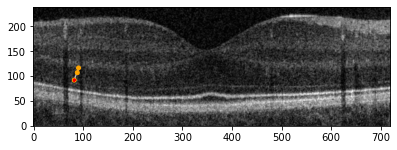

105.24322798863093
35.87896039302109


In [7]:
# worm = Camo_Worm(500.0, 125.0, 20.0, 0.0, -40.0, 1.9, 5.0, 0.15)
worm = random_worm(image.shape, (40, 30, 2))
l = worm.approx_length()
points = int(l / 15) if l/15 > 3 else 3
drawing = Drawing(image)
drawing.add_worms(worm)
point = worm.intermediate_points(points)
drawing.add_dots(worm.intermediate_points(points), 4, color="orange")

print(point)
rads = 0
step = math.pi / 16
for p in point:
    while rads < 2 * math.pi:
        x = p[0] + worm.width / 2 * math.cos(rads)
        y = p[1] + worm.width / 2 * math.sin(rads)
        drawing.add_dots([(x, y)], 1, color="red")
        rads += step
drawing.show()
print(np.sum(worm.environment_fitness(image, points)))
print(l)

Best environment worm point: x 163, y 100
Length: 42.65, width 1.53 and colour: 31.09
0.962988524500606 

Largest worm point: x 386, y 101
Length: 128.63, width 17.68 and colour: 12.17
0.8573174100491788 

0.0004397472607427104 



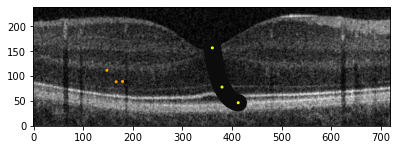

289


In [8]:
clew = initialise_clew(150, image.shape, (40, 30, 2))

best_worm: Camo_Worm = None
largest_worm: Camo_Worm = None
max_e = 0
max_l = 100000.0
for worm in clew:
    # print("Worm point: x %2d, y %2d" %(worm.x, worm.y))
    # print("Length: %.2f, width %.2f and colour: %.2f" % (worm.approx_length(), worm.width, worm.colour* 255 ))
    # print(worm.environment_fitness(image, 5), "\n")
    env_fitness = worm.environment_fitness2()
    if env_fitness > max_e:
        max_e = np.average(env_fitness)
        best_worm = worm
    size = 1 /( worm.width * worm.approx_length())
    if size < max_l:
        max_l = size
        largest_worm = worm


print("Best environment worm point: x %2d, y %2d" %(best_worm.x, best_worm.y))
print("Length: %.2f, width %.2f and colour: %.2f" % (best_worm.approx_length(), best_worm.width, best_worm.colour* 255 ))
print(best_worm.environment_fitness2(), "\n")

print("Largest worm point: x %2d, y %2d" %(largest_worm.x, largest_worm.y))
print("Length: %.2f, width %.2f and colour: %.2f" % (largest_worm.approx_length(), largest_worm.width, largest_worm.colour* 255 ))
print(largest_worm.environment_fitness2(), "\n")
print(max_l, "\n")

drawing = Drawing(image)
drawing.add_worms(best_worm)
drawing.add_worms(largest_worm)
# drawing.add_dots(best_worm.intermediate_points(int(best_worm.approx_length()/15)), 2, color="orange")
drawing.add_dots(best_worm.intermediate_points(), 2, color="orange")
drawing.add_dots(largest_worm.intermediate_points(3), 2, color="yellow")
drawing.show()

penalize = 0
for index in range(len(clew)):
    for index2 in range(index+1, len(clew)):
        distance = clew[index].distance(clew[index2].x, clew[index2].y)
        # print("Distance between worm %d and worm %d: %.2f" % (index, index2, distance))
        if distance < 40:
            penalize += 1
print(penalize)

In [5]:
def points_in_circle_np(radius, x0=0, y0=0):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    for x, y in zip(x_[x], y_[y]):
        yield x, y

In [15]:
radius, x0, y0 = [5, 0, 0]
x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
for x,y  in zip(x_, y_):
    print(x, y)